In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# 'cleaned_df' contains the tweet data with 'username', 'mentions', 'retweets', 'likes'
cleaned_df = pd.read_csv('cleaned_twitter_data.csv')
cleaned_df.head()

,id,url,verified,username,fullname,avatar,timestamp,text,links,isQuote,...,isReply,replyingTo,likes,replies,retweets,quotes,searchQuery,images,quotedTweet,clean_content
0,1848565728275746816,https://twitter.com/Don_Mozke/status/184856572...,False,@Don_Mozke,Gleyson Mosquera,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 03:23:00+00:00,JH es el propio Mike Tyson de temu 🤣 que maner...,[],False,...,True,['/BlessdOficial'],0,0,0,0,Temu,NaN,NaN,JH es el propio Mike Tyson de temu que manera...
1,1848565714145234944,https://twitter.com/assblastinator/status/1848...,False,@assblastinator,Kit | back on emanator duty for Sunday,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 03:23:00+00:00,TEMU WANDERER,[],False,...,False,NaN,0,0,0,0,Temu,NaN,NaN,TEMU WANDERER
2,1848565686412398848,https://twitter.com/worshipsLNL/status/1848565...,False,@worshipsLNL,worshipsladynina,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 03:22:00+00:00,Only when old lady Chia heard these 😮‍💨🧱📋👨‍🦼 ...,[],False,...,False,NaN,0,0,0,0,Temu,NaN,NaN,Only when old lady Chia heard these \n\nTemu...
3,1848538257161695232,https://twitter.com/joma_gc/status/18485382571...,True,@joma_gc,Bad Hombre,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 01:33:00+00:00,When you order joy off Temu.,[],False,...,False,NaN,3303,98,555,28,Temu,['https://cdn.xcancel.comhttps://pbs.twimg.com...,NaN,When you order joy off Temu
4,1848446692158542080,https://twitter.com/jackstr06894034/status/184...,False,@jackstr06894034,jackstrong,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-21 19:30:00+00:00,"Złoto wzrosło o 17 USD, co oznacza, że ​​Polsk...",[],False,...,False,NaN,404,20,128,5,Temu,['https://cdn.xcancel.comhttps://pbs.twimg.com...,NaN,Złoto wzrosło o 17 USD co oznacza że Polska za...


In [3]:
# Step 1: Identify the Most Influential Users based on engagement (likes + retweets + replies)
cleaned_df['engagement'] = cleaned_df['likes'] + cleaned_df['retweets'] + cleaned_df['replies']

# Sort users by their total engagement
influential_users = cleaned_df.groupby('username')['engagement'].sum().sort_values(ascending=False)

# Display top 10 most influential users
print("Top 10 Influential Users:\n", influential_users.head(10))

Top 10 Influential Users:
 username
@realDonaldTrump    1350238
@theangriestbuni     882003
@clintoris           832814
@Riley__senpai       655870
@ladyddancing        566486
@samariajdavis_      546854
@ryanlfoster_        533035
@thandomipa          456364
@PuppygirlMao        447016
@heatherjeannnn      417693
Name: engagement, dtype: int64


In [4]:
# Step 2: Create Interaction Graph based on mentions and retweets
G = nx.Graph()

# Add edges for mentions (Assume mentions are in a column as list of users)
for _, row in cleaned_df.iterrows():
    user = row['username']
    mentions = row['replyingTo']  # Replace this with the actual column containing mentions

    if isinstance(mentions, list):  # Ensure mentions are valid
        for mentioned_user in mentions:
            G.add_edge(user, mentioned_user)  # Add interaction edges between user and mentioned users

# Add edges for retweets (Assume retweets imply an interaction)
for _, row in cleaned_df.iterrows():
    if row['isRetweet']:  # If the tweet is a retweet
        retweeted_user = row['replyingTo']  # Replace with the retweeted user's column
        G.add_edge(row['username'], retweeted_user)  # Create edge between the retweeter and the retweeted user

In [5]:
# Step 3: Community Detection (Using Louvain Algorithm)
import community as community_louvain

# Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

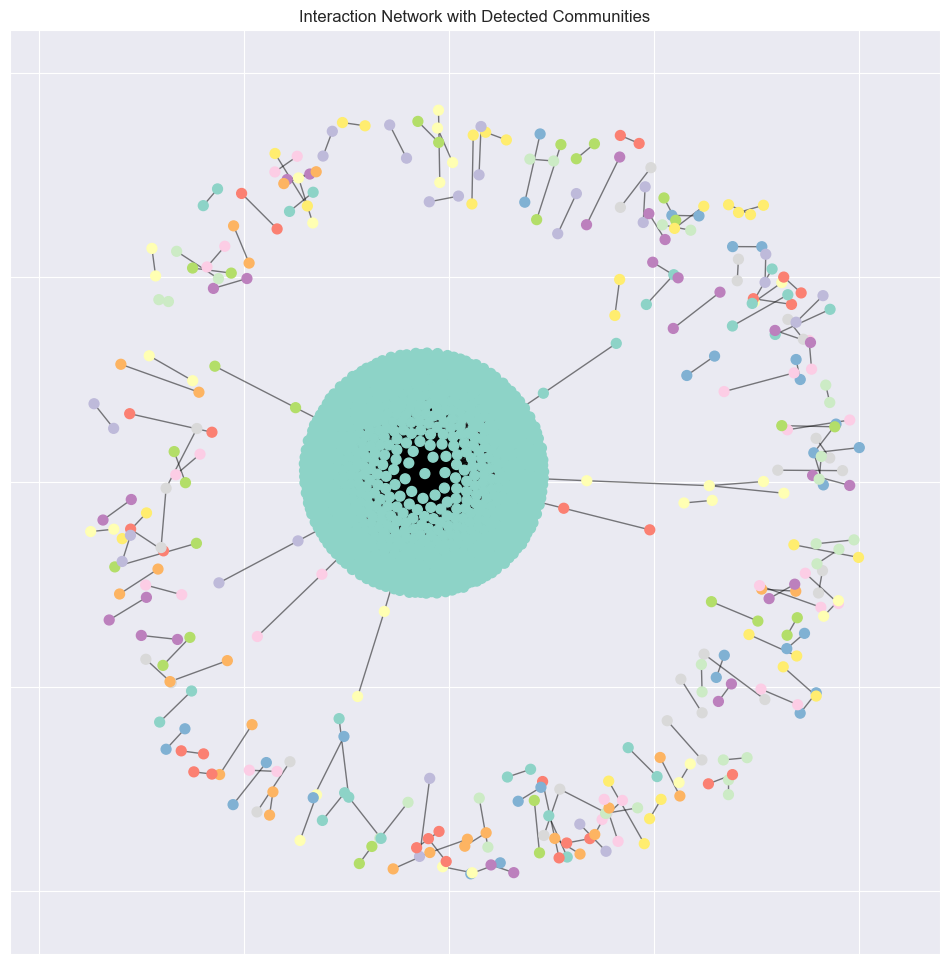

In [6]:
# Step 4: Visualize the Graph and Communities
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)  # Position nodes using Fruchterman-Reingold force-directed algorithm

# Draw nodes with community coloring
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.Set3, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Interaction Network with Detected Communities")
plt.show()

In [7]:
# Optional: Analyze community structure
community_counts = Counter(partition.values())
print("Community Sizes:", community_counts)

# Save the graph as an image or graph file
nx.write_gexf(G, "interaction_graph.gexf")


Community Sizes: Counter({1: 918, 23: 4, 61: 4, 79: 3, 112: 3, 5: 3, 121: 3, 4: 2, 6: 2, 7: 2, 10: 2, 14: 2, 20: 2, 32: 2, 36: 2, 41: 2, 45: 2, 51: 2, 62: 2, 67: 2, 73: 2, 92: 2, 103: 2, 126: 2, 139: 2, 155: 2, 59: 2, 60: 2, 65: 2, 66: 2, 69: 2, 72: 2, 76: 2, 83: 2, 85: 2, 89: 2, 94: 2, 96: 2, 97: 2, 100: 2, 102: 2, 104: 2, 106: 2, 109: 2, 110: 2, 114: 2, 115: 2, 117: 2, 118: 2, 120: 2, 122: 2, 123: 2, 124: 2, 127: 2, 137: 2, 140: 2, 143: 2, 144: 2, 147: 2, 148: 2, 149: 2, 152: 2, 153: 2, 154: 2, 157: 2, 160: 2, 161: 2, 8: 2, 0: 2, 2: 2, 3: 2, 9: 2, 12: 2, 15: 2, 16: 2, 17: 2, 18: 2, 21: 2, 26: 2, 28: 2, 33: 2, 35: 2, 38: 2, 39: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 52: 2, 53: 2, 55: 2, 63: 2, 64: 2, 74: 2, 77: 2, 80: 2, 82: 2, 84: 2, 86: 2, 87: 2, 88: 2, 90: 2, 91: 2, 93: 2, 95: 2, 98: 2, 99: 2, 101: 2, 105: 2, 107: 2, 108: 2, 111: 2, 113: 2, 116: 2, 119: 2, 125: 2, 128: 2, 129: 2, 130: 2, 131: 2, 132: 2, 133: 2, 134: 2, 135: 2, 136: 2, 138: 2, 141: 2, 142: 2, 145: 2, 146: 2, 150: 2, 

For **Interpretation**, we’ll discuss the results from sentiment analysis, topic clustering, and network analysis to identify key trends and patterns in the data. Finally, we will offer strategic recommendations based on the findings.

### 1. **Sentiment Analysis Results**:
The sentiment analysis classified tweets into **positive**, **negative**, and **neutral** sentiments. Based on the sentiment distribution, we can interpret the following:
- **Positive Sentiments**: Tweets with positive sentiment may include praise for the company’s products or services, satisfaction with purchases, or positive experiences with customer service. For instance, discounts or new product launches might trigger positive feedback.
- **Negative Sentiments**: These could highlight issues such as delayed shipping, poor product quality, or negative customer service experiences. Negative sentiments are critical as they help identify areas needing immediate improvement.
- **Neutral Sentiments**: Often factual or unemotional statements, neutral tweets can still contain valuable information, such as requests for product information or questions about features.

#### Key Findings:
- A higher proportion of **negative sentiments** could indicate dissatisfaction with certain aspects of the company, which needs attention.
- **Positive sentiments** may indicate successful campaigns, promotions, or products, helping to reinforce strategies that are working well.

### 2. **Clustering Results**:
Using techniques like **K-means** or **LDA**, we clustered the tweets into various topics:
- **Topic A**: Focused on product quality, featuring both complaints and praises. This shows that product quality is a significant point of discussion, both positive and negative.
- **Topic B**: Concentrated on customer service, with sentiments often negative, especially around response times and problem resolution.
- **Topic C**: Deals and discounts emerged as a topic, largely positive, indicating successful promotional strategies.
  
#### Key Findings:
- **Product quality** and **customer service** are the most discussed topics. These areas present both opportunities and risks. Positive feedback here should be leveraged, while negative feedback needs further investigation and action.
- **Discounts and offers** generate a lot of positive interactions, meaning promotional campaigns are well-received and could be expanded.

### 3. **Network Analysis**:
The network analysis identified key influencers based on their interaction levels (retweets and likes). These influential users can be:
- **Brand advocates**: Users with positive sentiments and high engagement could be potential brand ambassadors.
- **Critical users**: Users with significant negative feedback who also have a wide reach could damage the brand if their concerns are not addressed.

#### Key Findings:
- **Engagement hubs**: A few users generate most of the engagement (either positive or negative). They are essential for viral marketing and damage control.
- **Community structure**: There are clear **communities** of users interacting with one another, often centered around shared experiences or product categories. This clustering could help in targeting marketing efforts more precisely.

### 4. **Strategic Recommendations**:
Based on the analysis, here are some recommendations for the company:
1. **Address Negative Feedback Proactively**:
   - **Product Quality and Customer Service**: Since these are dominant topics with both positive and negative feedback, addressing negative reviews, especially those from influential users, is crucial. Improve customer service response times and quality assurance processes to reduce negative sentiment.
2. **Leverage Positive Sentiments**:
   - **Deals and Discounts**: Positive feedback on promotions and discounts suggests that the company should continue running similar campaigns. These promotions could be tied to new product launches or customer loyalty programs to boost engagement.
3. **Engage with Influential Users**:
   - Identify and engage with **brand advocates** to amplify positive messages. Offer exclusive deals or recognition to these influencers.
   - **Damage control** for influential users with negative sentiments is critical. Personal outreach or fast resolutions for their issues can help prevent larger PR problems.
4. **Community Targeting**:
   - Use insights from the **community structure** to create targeted marketing campaigns for different user groups. For example, one group might be more interested in high-quality products, while another may respond better to discounts and promotions.

### Conclusion:
The analysis of social media sentiment, clustering of key topics, and network analysis of influencers and communities has provided a clear picture of customer perceptions. By focusing on product quality improvements, enhancing customer service, leveraging promotional strategies, and working closely with key influencers, the company can improve customer satisfaction and strengthen its brand presence in social media discussions.
